In [ ]:
import zipfile
import os

zip_file_path = '/content/drive/MyDrive/PlantVillage.zip'
extracted_folder_path = '/content/PlantVillage'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

In [ ]:
import glob
import pandas as pd
import numpy as np

In [3]:
image_path = glob.glob('/content/PlantVillage/PlantVillage/*/*.*')
image_path[:10]

['/content/PlantVillage/PlantVillage/Potato___Early_blight/ac40d7e9-e650-40f1-b894-22f495febefd___RS_Early.B 7276.JPG',
 '/content/PlantVillage/PlantVillage/Potato___Early_blight/9db872fc-f367-4dfa-b1f7-23490bb4552b___RS_Early.B 8842.JPG',
 '/content/PlantVillage/PlantVillage/Potato___Early_blight/f400079a-ff67-45c2-8a50-5c5b1e08dc25___RS_Early.B 8491.JPG',
 '/content/PlantVillage/PlantVillage/Potato___Early_blight/86e98583-f506-4cb7-ba11-eea466662ec7___RS_Early.B 7335.JPG',
 '/content/PlantVillage/PlantVillage/Potato___Early_blight/e5c94100-3e1c-4fb1-8b6b-f281b491adff___RS_Early.B 8604.JPG',
 '/content/PlantVillage/PlantVillage/Potato___Early_blight/5deee0ba-6bbb-450e-a107-102063e2f93b___RS_Early.B 7429.JPG',
 '/content/PlantVillage/PlantVillage/Potato___Early_blight/1b4304a9-88c2-4c09-bfea-830fa162a35a___RS_Early.B 7188.JPG',
 '/content/PlantVillage/PlantVillage/Potato___Early_blight/b4021eae-d195-400a-b7b7-9888367f5f2f___RS_Early.B 7881.JPG',
 '/content/PlantVillage/PlantVillage/Pot

In [4]:
potato_data_dir = {
    'early_blight' : glob.glob('/content/PlantVillage/PlantVillage/Potato___Early_blight/*.*'),
    'late_blight' : glob.glob('/content/PlantVillage/PlantVillage/Potato___Late_blight/*.*'),
    'healthy' : glob.glob('/content/PlantVillage/PlantVillage/Potato___healthy/*.*')
}

In [5]:
potato_data_label = {
    'early_blight' : 0,
    'late_blight' : 1,
    'healthy' : 2
}

In [6]:
import cv2
x = []
y = []
for label, images in potato_data_dir.items():
  for image in images:
    image = cv2.imread(image)
    image = cv2.resize(image, (64, 64))
    x.append(image)
    y.append(potato_data_label[label])

In [7]:
print(x)

[array([[[206, 193, 191],
        [213, 200, 198],
        [204, 191, 189],
        ...,
        [152, 136, 137],
        [158, 142, 143],
        [149, 133, 134]],

       [[222, 209, 207],
        [217, 204, 202],
        [214, 201, 199],
        ...,
        [154, 138, 139],
        [152, 136, 137],
        [159, 143, 144]],

       [[226, 213, 211],
        [221, 208, 206],
        [212, 199, 197],
        ...,
        [162, 146, 147],
        [151, 135, 136],
        [162, 146, 147]],

       ...,

       [[165, 151, 152],
        [165, 151, 152],
        [170, 156, 157],
        ...,
        [129, 118, 120],
        [139, 129, 130],
        [140, 130, 129]],

       [[173, 159, 160],
        [177, 163, 164],
        [170, 156, 157],
        ...,
        [146, 132, 135],
        [159, 145, 147],
        [144, 131, 131]],

       [[162, 148, 149],
        [173, 159, 160],
        [177, 163, 164],
        ...,
        [138, 124, 127],
        [140, 126, 127],
        [124, 110, 110]

In [8]:
x_array = np.array(x)
y_array = np.array(y)

In [9]:
x_array.shape

(2152, 64, 64, 3)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_array, y_array, test_size=0.2, random_state=42)

In [11]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [12]:
x_train.shape

(1721, 64, 64, 3)

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [14]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(x_train, y_train, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 14s 208ms/step - accuracy: 0.5099 - loss: 0.9302
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 235ms/step - accuracy: 0.7757 - loss: 0.5984
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 20s 221ms/step - accuracy: 0.8189 - loss: 0.4263
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 21s 224ms/step - accuracy: 0.8687 - loss: 0.3125
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 20s 223ms/step - accuracy: 0.9140 - loss: 0.2515
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 21s 227ms/step - accuracy: 0.9264 - loss: 0.1967
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 226ms/step - accuracy: 0.9333 - loss: 0.1999
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 195ms/step - accuracy: 0.9741 - loss: 0.1020
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 22s 223ms/step - accuracy: 0.9747 - loss: 0.0796
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 205ms/step - accuracy: 0.9591 - loss: 0.1069


In [17]:
model.evaluate(x_test, y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 191ms/step - accuracy: 0.9789 - loss: 0.0640


[0.06803994625806808, 0.9791183471679688]

In [18]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred))

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       196
           1       0.98      0.97      0.98       198
           2       0.92      0.92      0.92        37

    accuracy                           0.98       431
   macro avg       0.96      0.96      0.96       431
weighted avg       0.98      0.98      0.98       431



In [22]:
def print_image_label(label):
  if label == 0:
    return 'early_blight'
  elif label == 1:
    return 'late_blight'
  elif label == 2:
    return 'healthy'

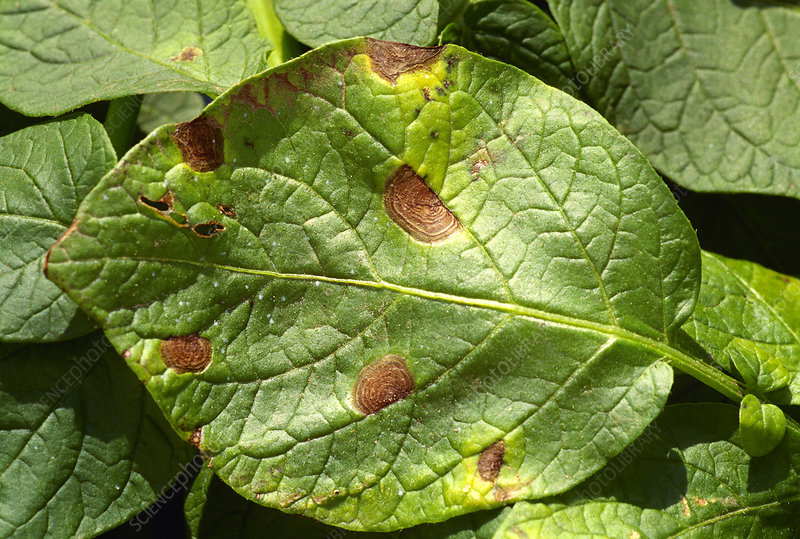

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


'early_blight'

In [26]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/early_blight.jpg')
cv2_imshow(img)
img = cv2.resize(img, (64, 64))
img = img / 255.0
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
print_image_label(np.argmax(prediction))

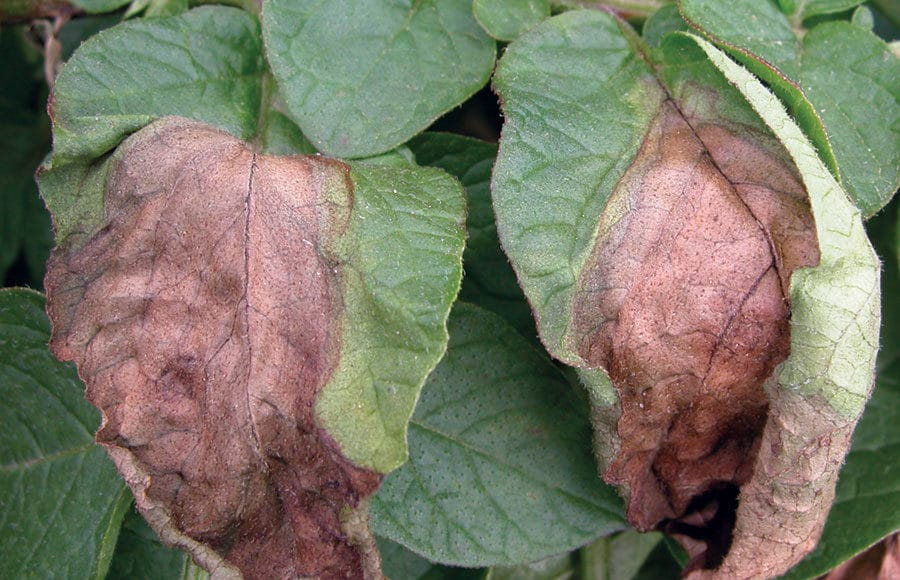

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


'late_blight'

In [28]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/late_blight.jpeg')
cv2_imshow(img)
img = cv2.resize(img, (64, 64))
img = img / 255.0
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
print_image_label(np.argmax(prediction))